In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [20]:

stock_data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')
market_data = yf.download('^GSPC', start='2015-01-01', end='2023-01-01')

print(stock_data.head(3))

# Risk-free rate 
risk_free_rate = 0.02 / 252  #(assuming 252 trading days in a year)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
               Open       High        Low      Close  Adj Close     Volume
Date                                                                      
2015-01-02  27.8475  27.860001  26.837500  27.332500  24.373960  212818400
2015-01-05  27.0725  27.162500  26.352501  26.562500  23.687309  257142000
2015-01-06  26.6350  26.857500  26.157499  26.565001  23.689535  263188400


In [10]:
#daily_returns calculations
stock_data['Return'] = stock_data['Adj Close'].pct_change()
market_data['Market Return'] = market_data['Adj Close'].pct_change()


stock_data.dropna(inplace=True)
market_data.dropna(inplace=True)

data = pd.DataFrame({
    'Stock Return': stock_data['Return'],
    'Market Return': market_data['Market Return']
})

data.dropna(inplace=True)
data


,Stock Return,Market Return
Date,,
2015-01-06,0.000094,-0.008893
2015-01-07,0.014022,0.011630
2015-01-08,0.038422,0.017888
2015-01-09,0.001072,-0.008404
2015-01-12,-0.024641,-0.008094
...,...,...
2022-12-23,-0.002798,0.005868
2022-12-27,-0.013878,-0.004050
2022-12-28,-0.030685,-0.012021


In [4]:
# Independent variable (Market Return)
X = data['Market Return'].values.reshape(-1, 1)  
# Dependent variable (Stock Return)
y = data['Stock Return'].values  

# Spliting 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')


Training set size: 1610
Test set size: 403


In [5]:

model = LinearRegression()
model.fit(X_train, y_train)

beta = model.coef_[0]
alpha = model.intercept_

print(f'Beta (Slope): {beta}')
print(f'Alpha (Intercept): {alpha}')


Beta (Slope): 1.2250925281162934
Alpha (Intercept): 0.000621673845615196


In [6]:
# Making predictions 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [15]:
# Calculation of metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training Set MSE: {mse_train:.4f}, R²: {r2_train:.4f}')
print(f'Test Set MSE: {mse_test:.4f}, R²: {r2_test:.4f}')


Training Set MSE: 0.0001, R²: 0.5975
Test Set MSE: 0.0002, R²: 0.5083


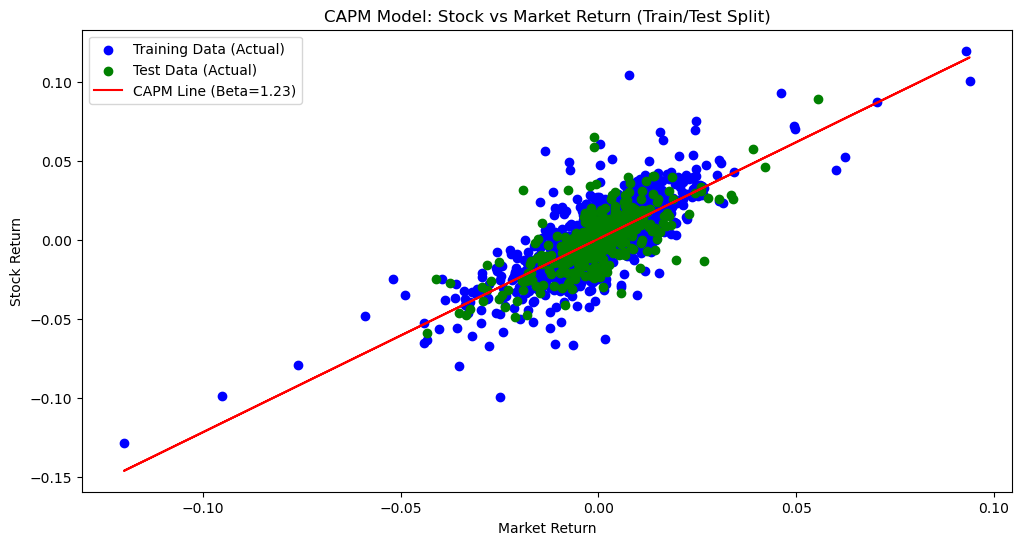

In [8]:
plt.figure(figsize=(12, 6))

#for train data
plt.scatter(X_train, y_train, color='blue', label='Training Data (Actual)')
plt.scatter(X_test, y_test, color='green', label='Test Data (Actual)')

# for training data
plt.plot(X_train, model.predict(X_train), color='red', label=f'CAPM Line (Beta={beta:.2f})')

plt.title('CAPM Model: Stock vs Market Return (Train/Test Split)')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')
plt.legend()
plt.show()


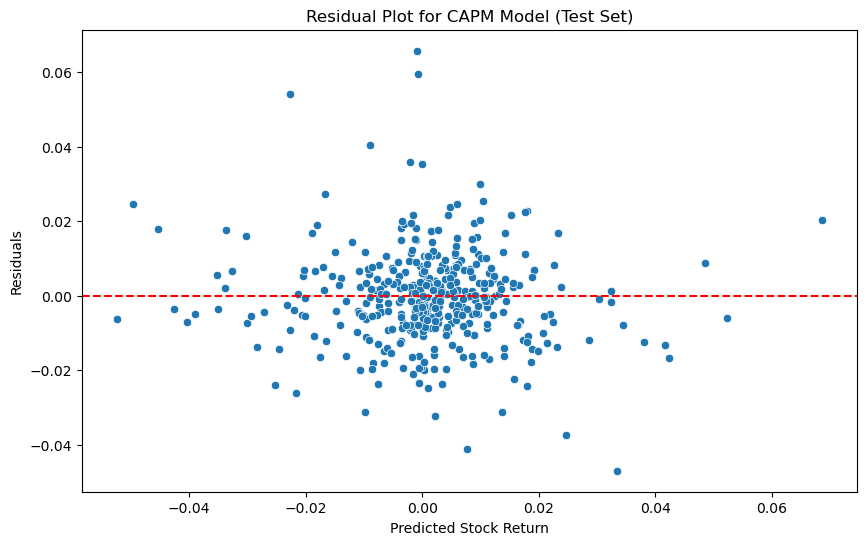

In [9]:
# Residuals for test set
residuals = y_test - y_pred_test

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for CAPM Model (Test Set)')
plt.xlabel('Predicted Stock Return')
plt.ylabel('Residuals')
plt.show()
